# Analyse des Vulnérabilités - Visualisations et Interprétations
### Ce notebook présente une série de visualisations basées sur les données des vulnérabilités recensées. 

Les graphiques permettront de mieux comprendre la distribution des vulnérabilités, leurs gravités, et les produits les plus impactés.

## Import des bibliothèques nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement des données
Note : Remplacez `data` par vos données réelles.

In [3]:
CSV_FILE = "../data_anssi.csv"
df = pd.read_csv(CSV_FILE)

# supprimer les doublons de ligne dans le DataFrame
df.drop_duplicates(inplace=True)
# remplacer les valeurs "Non disponible" par nan 
df.replace("Non disponible", pd.NA, inplace=True)
# supprimer les lignes avec des valeurs manquantes
df.dropna(inplace=True)
# supprimer les lignes avec des valeurs manquantes
df['CVSS Score'] = pd.to_numeric(df['CVSS Score'], errors='coerce')
df['EPSS'] = pd.to_numeric(df['EPSS'], errors='coerce')



## Configuration générale pour les graphiques

In [4]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

---
## Visualisations

### 1. Histogramme des scores CVSS

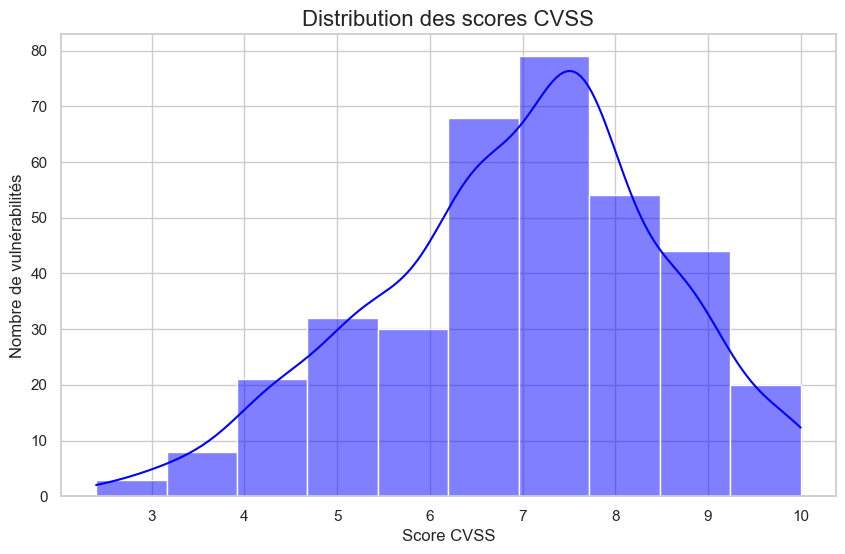

In [5]:
plt.figure()
sns.histplot(df['CVSS Score'], bins=10, kde=True, color='blue')
plt.title("Distribution des scores CVSS", fontsize=16)
plt.xlabel("Score CVSS", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.show()

### 2. Diagramme circulaire des types de vulnérabilités (CWE)

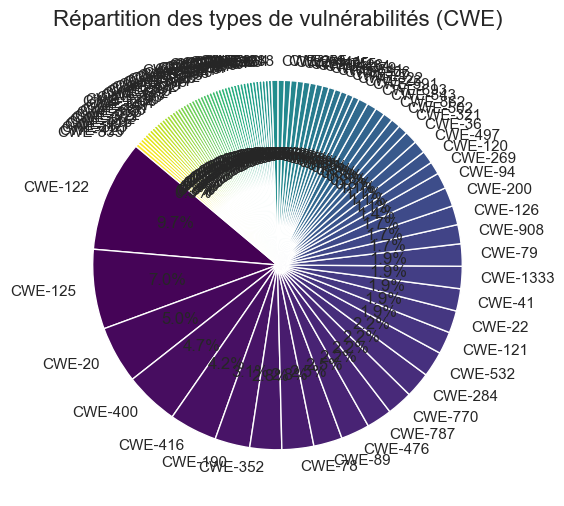

In [6]:
plt.figure()
cwe_counts = df['CWE'].value_counts()
cwe_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title("Répartition des types de vulnérabilités (CWE)", fontsize=16)
plt.ylabel("")
plt.show()

### 3. Courbe des scores EPSS

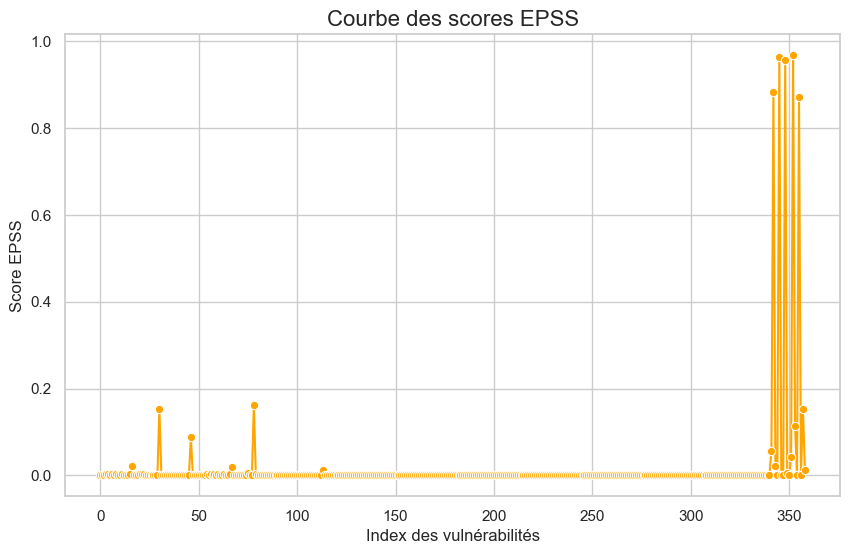

In [7]:
plt.figure()
sns.lineplot(x=range(len(df)), y='EPSS', data=df, marker='o', color='orange')
plt.title("Courbe des scores EPSS", fontsize=16)
plt.xlabel("Index des vulnérabilités", fontsize=12)
plt.ylabel("Score EPSS", fontsize=12)
plt.show()

### 4. Classement des produits les plus affectés

C:\Users\toino\AppData\Local\Temp\ipykernel_19388\3734468648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts, y=product_counts.index, palette="Blues_d")


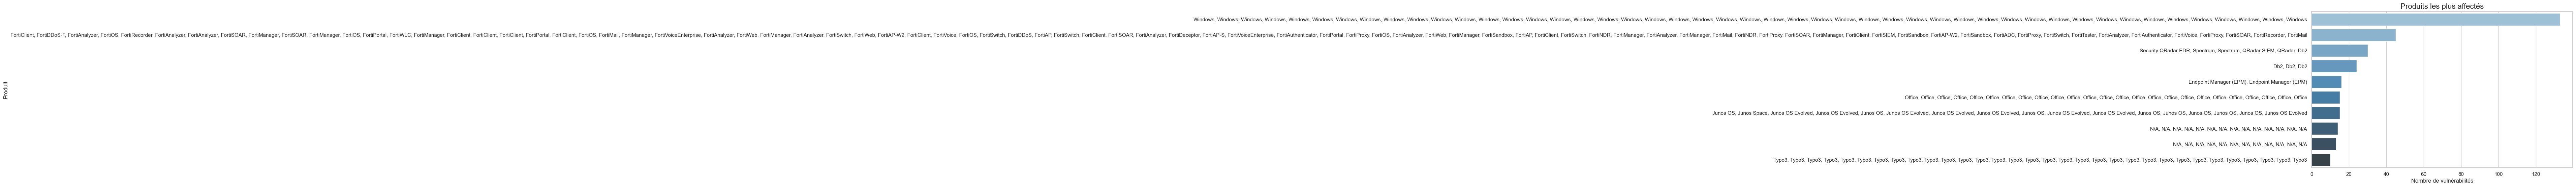

In [8]:
plt.figure()
product_counts = df['Produits impactés'].value_counts().head(10)
sns.barplot(x=product_counts, y=product_counts.index, palette="Blues_d")
plt.title("Produits les plus affectés", fontsize=16)
plt.xlabel("Nombre de vulnérabilités", fontsize=12)
plt.ylabel("Produit", fontsize=12)
plt.show()

### 5. Heatmap des corrélations entre CVSS et EPSS

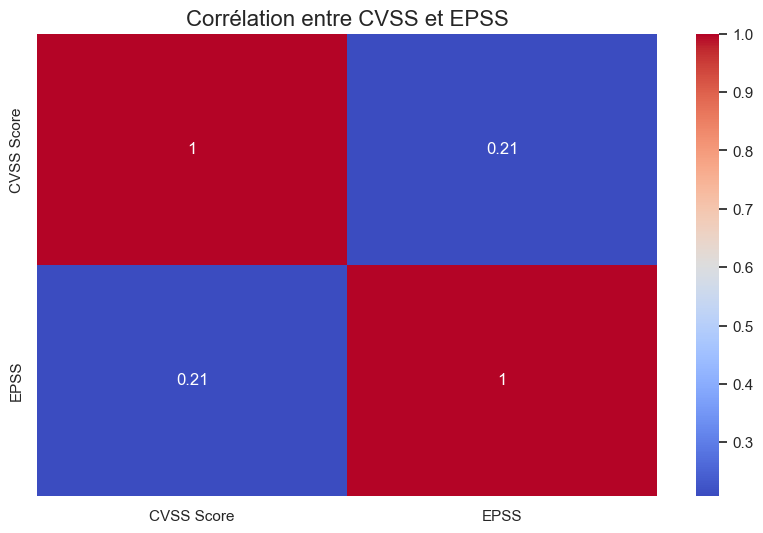

In [9]:
plt.figure()
corr_matrix = df[['CVSS Score', 'EPSS']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Corrélation entre CVSS et EPSS", fontsize=16)
plt.show()

### 6. Nuage de points entre CVSS et EPSS

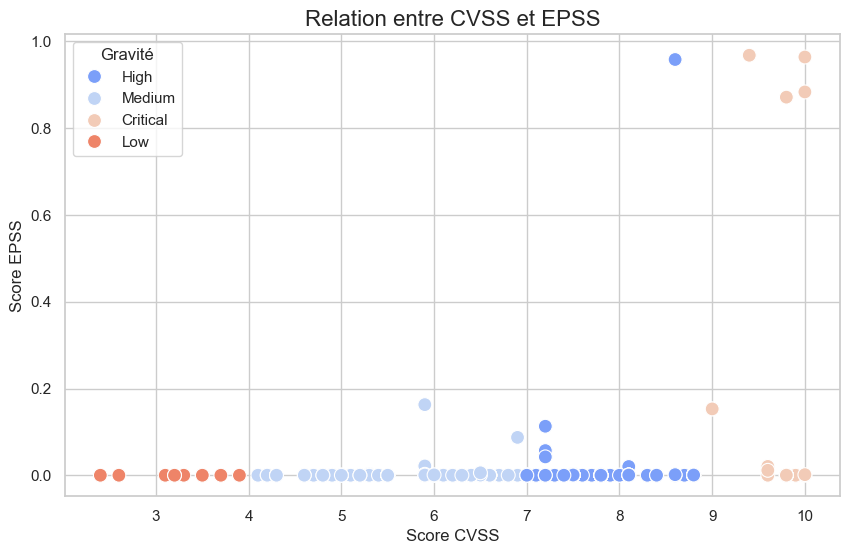

In [11]:
plt.figure()
sns.scatterplot(x='CVSS Score', y='EPSS', data=df, hue='CVSS Severity', palette='coolwarm', s=100)
plt.title("Relation entre CVSS et EPSS", fontsize=16)
plt.xlabel("Score CVSS", fontsize=12)
plt.ylabel("Score EPSS", fontsize=12)
plt.legend(title="Gravité")
plt.show()

### 7. Boxplot des scores CVSS par éditeur

C:\Users\toino\AppData\Local\Temp\ipykernel_19388\894889506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Editeur', y='CVSS Score', data=df, palette='Set3')


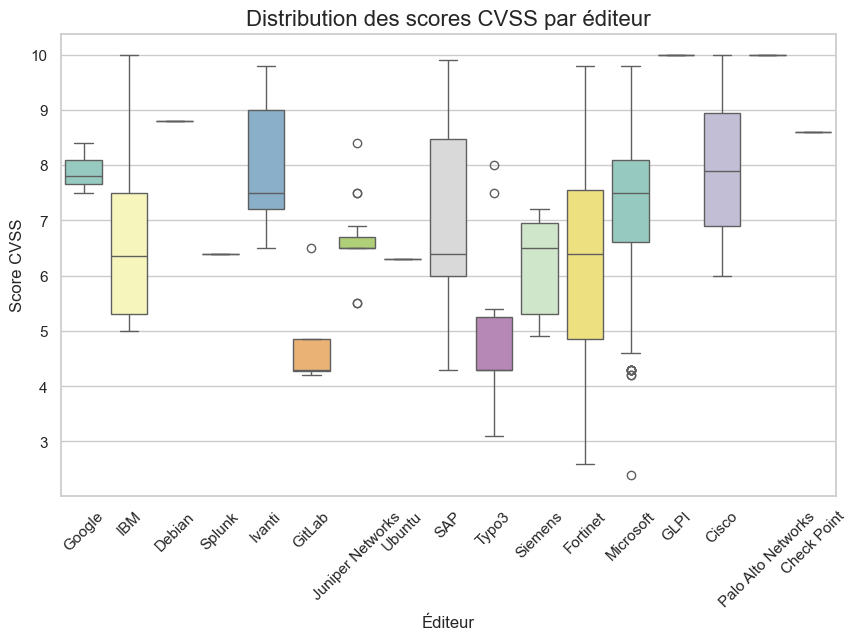

In [14]:
plt.figure()
sns.boxplot(x='Editeur', y='CVSS Score', data=df, palette='Set3')
plt.title("Distribution des scores CVSS par éditeur", fontsize=16)
plt.xlabel("Éditeur", fontsize=12)
plt.ylabel("Score CVSS", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 8. Évolution temporelle du nombre de vulnérabilités détectées

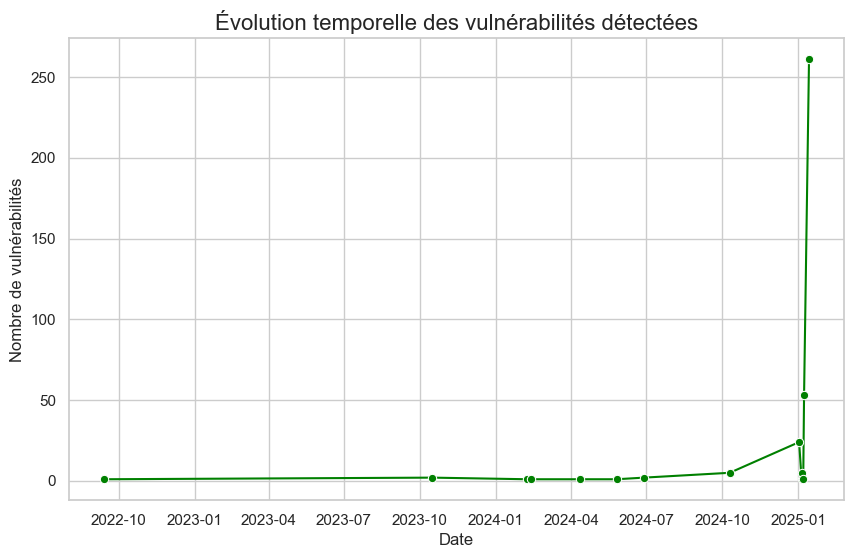

In [16]:
df['Date publication bulletin anssi'] = pd.to_datetime(df['Date publication bulletin anssi'])  # Conversion en format datetime
vuln_per_date = df.groupby('Date publication bulletin anssi').size()
plt.figure()
sns.lineplot(x=vuln_per_date.index, y=vuln_per_date.values, marker='o', color='green')
plt.title("Évolution temporelle des vulnérabilités détectées", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.show()

Note : Malheureusement, certains graphiques ne sont pas très convaincants, car le DataFrame semble ne pas être suffisamment rempli ou correctement alimenté, malgré le nettoyage effectué de notre part.